In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import imdb
from keras import layers

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5153 - accuracy: 0.7877 - val_loss: 0.3973 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3172 - accuracy: 0.8987 - val_loss: 0.3193 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2378 - accuracy: 0.9202 - val_loss: 0.3086 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1904 - accuracy: 0.9382 - val_loss: 0.2796 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1598 - accuracy: 0.9477 - val_loss: 0.2842 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1356 - accuracy: 0.9557 - val_loss: 0.3275 - val_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1158 - accuracy: 0.9631 - val_loss: 0.2975 - val_accuracy: 0.8864
Epoch 8/20
3

In [5]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_dropout_05 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.6369 - accuracy: 0.6321 - val_loss: 0.5379 - val_accuracy: 0.8487
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5241 - accuracy: 0.7637 - val_loss: 0.4205 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.4466 - accuracy: 0.8150 - val_loss: 0.3516 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3765 - accuracy: 0.8544 - val_loss: 0.3005 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3262 - accuracy: 0.8823 - val_loss: 0.2866 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2848 - accuracy: 0.9008 - val_loss: 0.2988 - val_accuracy: 0.8727
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2533 - accuracy: 0.9163 - val_loss: 0.2757 - val_accuracy: 0.8922
Epoch 8/20
30

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_dropout_01 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.5545 - accuracy: 0.7491 - val_loss: 0.4146 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3698 - accuracy: 0.8681 - val_loss: 0.3225 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2823 - accuracy: 0.9005 - val_loss: 0.3057 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2317 - accuracy: 0.9204 - val_loss: 0.2764 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1933 - accuracy: 0.9349 - val_loss: 0.3099 - val_accuracy: 0.8770
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1629 - accuracy: 0.9471 - val_loss: 0.3388 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1409 - accuracy: 0.9531 - val_loss: 0.2958 - val_accuracy: 0.8864
Epoch 8/20
30

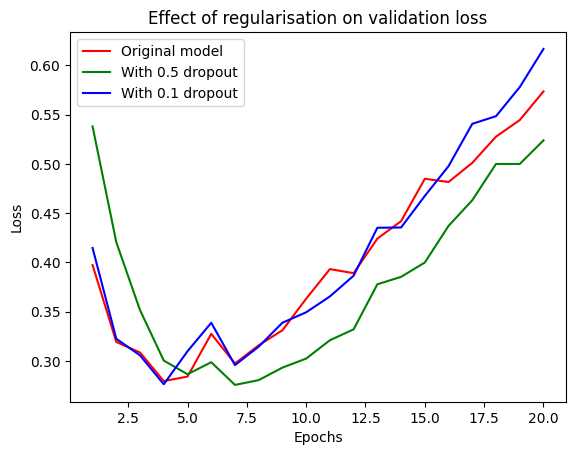

In [7]:
original_val_loss = history_original.history["val_loss"]
dropout_05_val_loss = history_dropout_05.history["val_loss"]
dropout_01_val_loss = history_dropout_01.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "r-", label="Original model")
plt.plot(epochs, dropout_05_val_loss, "g-", label="With 0.5 dropout")
plt.plot(epochs, dropout_01_val_loss, "b-", label="With 0.1 dropout")
plt.title("Effect of regularisation on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()